## Feature Engineering and CV based Winners' Solutions

continued from eda_4_26

New in this notebook:
- Trained@2015-06-28, validated@2015-12-28, MAP@7=0.858, private LB=0.0302798, public LB=0.0298547

In [1]:
from santander_helper import *

In [4]:
param = {'objective': 'multi:softprob', 
         'eta': 0.05, 
         'max_depth': 12, 
         'silent': 1, 
         'num_class': len(target_cols),
         'eval_metric': 'mlogloss',
         'min_child_weight': 1,
         'subsample': 0.7,
         'colsample_bytree': 0.7,
         'seed': 0}
num_rounds = 50

history, model_dict, y_pred, y_sub = \
    train_test_month(param, num_rounds, '2015-06-28', '2016-05-28', 
    'eda_4_32.csv.gz', n_repeat=5, random_seed=54, n_features=None)

Train, validate, and predict, repetition 0 of 5
[0]	train-mlogloss:2.67212	val-mlogloss:2.70209	train-MAP@7:0.894096	val-MAP@7:0.825647
[1]	train-mlogloss:2.48044	val-mlogloss:2.55213	train-MAP@7:0.899081	val-MAP@7:0.835711
[2]	train-mlogloss:2.32797	val-mlogloss:2.41655	train-MAP@7:0.903008	val-MAP@7:0.843075
[3]	train-mlogloss:2.20257	val-mlogloss:2.30785	train-MAP@7:0.904453	val-MAP@7:0.842816
[4]	train-mlogloss:2.09449	val-mlogloss:2.21119	train-MAP@7:0.90583	val-MAP@7:0.846503
[5]	train-mlogloss:1.9999	val-mlogloss:2.13386	train-MAP@7:0.907031	val-MAP@7:0.846882
[6]	train-mlogloss:1.91586	val-mlogloss:2.06583	train-MAP@7:0.907942	val-MAP@7:0.847751
[7]	train-mlogloss:1.84075	val-mlogloss:2.00642	train-MAP@7:0.908637	val-MAP@7:0.849323
[8]	train-mlogloss:1.77246	val-mlogloss:1.94645	train-MAP@7:0.909238	val-MAP@7:0.85009
[9]	train-mlogloss:1.7098	val-mlogloss:1.89192	train-MAP@7:0.91031	val-MAP@7:0.850983
[10]	train-mlogloss:1.65219	val-mlogloss:1.84781	train-MAP@7:0.911002	val-MAP

[41]	train-mlogloss:0.86564	val-mlogloss:1.22911	train-MAP@7:0.927728	val-MAP@7:0.85458
[42]	train-mlogloss:0.854498	val-mlogloss:1.22047	train-MAP@7:0.928048	val-MAP@7:0.854656
[43]	train-mlogloss:0.844037	val-mlogloss:1.21187	train-MAP@7:0.928354	val-MAP@7:0.854946
[44]	train-mlogloss:0.833528	val-mlogloss:1.20494	train-MAP@7:0.928782	val-MAP@7:0.854955
[45]	train-mlogloss:0.823808	val-mlogloss:1.19767	train-MAP@7:0.929265	val-MAP@7:0.855311
[46]	train-mlogloss:0.814366	val-mlogloss:1.1921	train-MAP@7:0.929651	val-MAP@7:0.855012
[47]	train-mlogloss:0.80536	val-mlogloss:1.1852	train-MAP@7:0.93015	val-MAP@7:0.855148
[48]	train-mlogloss:0.796455	val-mlogloss:1.1791	train-MAP@7:0.930583	val-MAP@7:0.855279
[49]	train-mlogloss:0.787733	val-mlogloss:1.17338	train-MAP@7:0.930878	val-MAP@7:0.855268
Validate logloss = 1.17338, MAP@7 = 0.85527, time = 6.20 min
--------------------------------------------------

Train, validate, and predict, repetition 2 of 5
[0]	train-mlogloss:2.67217	val-mlogl

[30]	train-mlogloss:1.0228	val-mlogloss:1.34461	train-MAP@7:0.923615	val-MAP@7:0.854757
[31]	train-mlogloss:1.00524	val-mlogloss:1.33106	train-MAP@7:0.924328	val-MAP@7:0.85466
[32]	train-mlogloss:0.988471	val-mlogloss:1.31695	train-MAP@7:0.924719	val-MAP@7:0.854973
[33]	train-mlogloss:0.972415	val-mlogloss:1.30412	train-MAP@7:0.925125	val-MAP@7:0.85514
[34]	train-mlogloss:0.957134	val-mlogloss:1.29176	train-MAP@7:0.92545	val-MAP@7:0.854956
[35]	train-mlogloss:0.942287	val-mlogloss:1.28094	train-MAP@7:0.926125	val-MAP@7:0.855054
[36]	train-mlogloss:0.927854	val-mlogloss:1.26961	train-MAP@7:0.926719	val-MAP@7:0.855009
[37]	train-mlogloss:0.914195	val-mlogloss:1.25862	train-MAP@7:0.927157	val-MAP@7:0.855464
[38]	train-mlogloss:0.901329	val-mlogloss:1.2492	train-MAP@7:0.92746	val-MAP@7:0.855399
[39]	train-mlogloss:0.888635	val-mlogloss:1.24032	train-MAP@7:0.927968	val-MAP@7:0.855477
[40]	train-mlogloss:0.876613	val-mlogloss:1.23096	train-MAP@7:0.928352	val-MAP@7:0.855532
[41]	train-mloglos

In [5]:
history_train = history.xs(axis=1, level=[1, 2], key=['train', 'MAP@7']).copy()
history_train['mean'] = history_train.iloc[:, :3].mean(axis=1)
history_train['std'] = history_train.iloc[:, :3].std(axis=1)

history_val = history.xs(axis=1, level=[1, 2], key=['val', 'MAP@7']).copy()
history_val['mean'] = history_val.iloc[:, :3].mean(axis=1)
history_val['std'] = history_val.iloc[:, :3].std(axis=1)

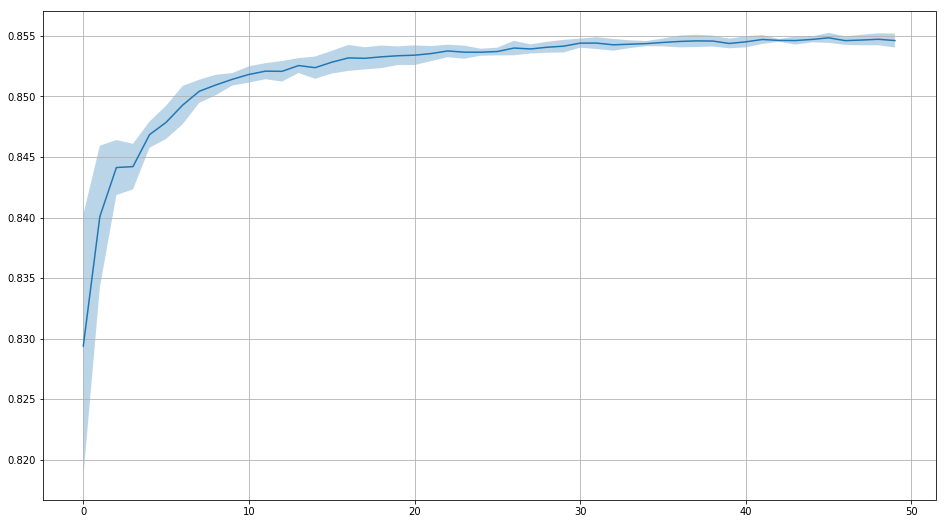

In [6]:
plt.figure(figsize=(16, 9))
# plt.plot(history_train['mean'])
# plt.fill_between(history_train.index, history_train['mean']+history_train['std'], history_train['mean']-history_train['std'], alpha=0.3)

plt.plot(history_val['mean'])
plt.fill_between(history_val.index, history_val['mean']+history_val['std'], history_val['mean']-history_val['std'], alpha=0.3)

plt.grid()

In [8]:
n_repeat = 5
fi = pd.DataFrame({i: model_dict[i].get_score(importance_type='gain') for i in range(n_repeat)})
fi['mean'] = fi.iloc[:, :n_repeat].mean(axis=1)
fi['std'] = fi.iloc[:, :n_repeat].std(axis=1)
fi.sort_values(by=['mean'], inplace=True, ascending=False)
# fi.reset_index(inplace=True)
# fi.to_csv('feature_importance.csv')

(391, -0.5)

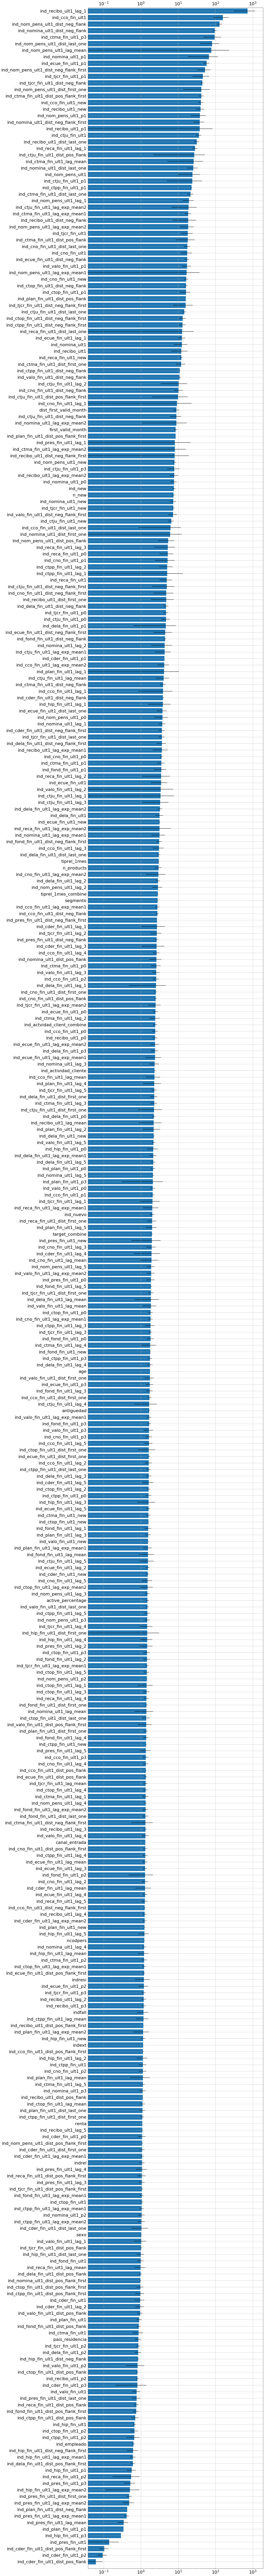

In [9]:
plt.rcParams.update({'figure.figsize': '16, 240'})
plt.rcParams.update({'font.size': '22'})
fig, ax = plt.subplots()
ax.barh(fi.index, fi['mean'].values, log=True, xerr=fi['std'].values)
ax.grid()
ax.tick_params(labelbottom=True,labeltop=True)
ax.set_ylim(fi.shape[0], -0.5)

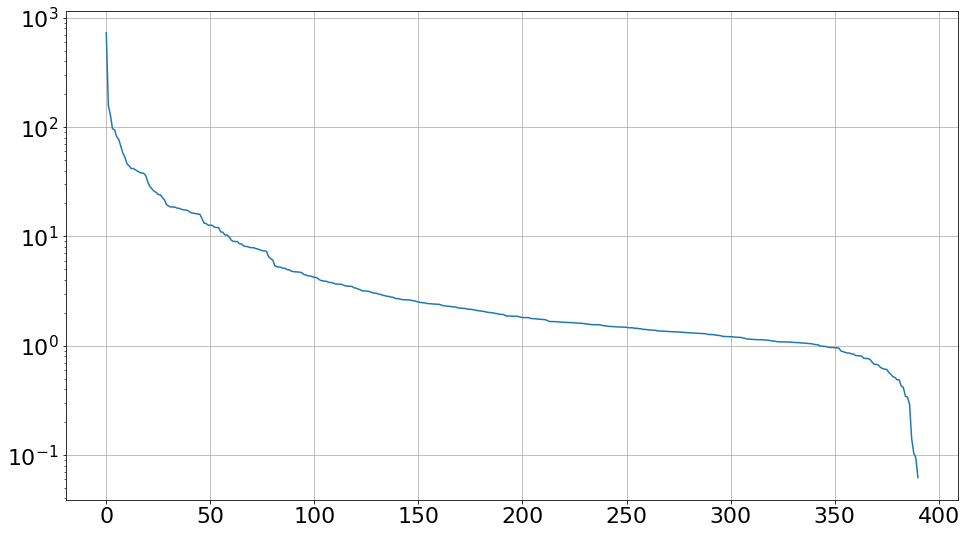

In [11]:
plt.figure(figsize=(16, 9))
plt.plot(fi.values[:, n_repeat])
plt.grid()
plt.yscale('log')

In [12]:
fi.iloc[350]

0       1.046974
1            NaN
2       0.646355
3       1.178745
4            NaN
mean    0.957358
std     0.277278
Name: ind_cder_fin_ult1, dtype: float64